<a href="https://colab.research.google.com/github/lin3372/400_gan/blob/main/400_gan_248_keras_implementation_of_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[github(bnsreenu) - 248_keras_implementation_of_GAN](https://github.com/bnsreenu/python_for_microscopists/blob/master/248_keras_implementation_of_GAN/248-cifar_GAN.py)

[youtube (31min) - 248_keras_implementation_of_GAN](https://www.youtube.com/watch?v=TXy5wZknie8)

[Machinelearningmastery - How to Develop a GAN to Generate CIFAR10 Small Color Photographs](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/)

# Library, Parameters

In [1]:
import numpy as np
import tensorflow as tf
import random as rand
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import  plot_model

from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
FIG_SIZE=(6,6)
INPUT_IMG_SZ=(32,32,3)

# Topics of Content

Topics in this tutorials:
0. GAN Introduction
1. CIFAR-10 Small Object Photograph Dataset
2. How to Define and Train the Discriminator Model
3. How to Define and Use the Generator Model
4. How to Evaluate GAN Model Performance
5. How to Train the Generator Model
6. Complete Example of GAN for CIFAR-10
7. How to Use the Final Generator Model to Generate Images

# **0. GAN (Generative Adversarial Networks)** Introduction - Basic ideas

Generative Adversarial Networks, or GANs, are an architecture for training generative models, such as deep convolutional neural networks for generating images.

Developing a GAN for generating images requires both 
1. **Discriminator** convolutional neural network model for classifying whether a given image is real or generated, and 
2.  **Generator** model that uses inverse convolutional layers to transform an input to a full two-dimensional image of pixel values.

It can be challenging to understand both how GANs work and how deep convolutional neural network models can be trained in a GAN architecture for image generation. A good starting point for beginners is to practice developing and using GANs on standard image datasets used in the field of computer vision, such as the CIFAR small object photograph dataset. The code by **Jason Brownlee** from his blogs on https://machinelearningmastery.com/

* Regular **GAN** that generates images using a random latent vector as input.
* While it works great we do not know the mapping of latent vector to the generated image.
* **Conditional GANs** can be used to supply a label during taining so the latent vector can be associated with a specific label - making the generation of images predictable. 


Expected Takeaway:

1. How to define and train the standalone **Discriminator model** for learning the difference between real and fake images.
2. How to define the standalone **Generator model** and train the composite generator and discriminator model.
3. How to evaluate the performance of the GAN and use the final standalone generator model to generate new images.

# **1. CIFAR-10 Small Object Photograph Dataset**



**CIFAR* is an acronym for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, airplanes, etc.

Keras provides access to the CIFAR10 dataset via the **cifar10.load_dataset()** function. It returns two tuples, one with the input and output elements for the standard training dataset, and another with the input and output elements for the standard test dataset.

## Load Cifar10 and plot to get a quick understanding
Note: the first time you load the dataset, Keras will automatically download a compressed version of the images and save them under your home directory in **~/.keras/datasets**

CIFAR10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

170508288/170498071 [==============================] - 11s 0us/step
Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


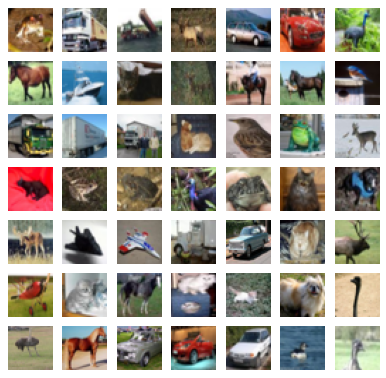

In [3]:
# example of loading the cifar10 dataset
from keras.datasets.cifar10 import load_data
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

# CIFAR10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse,
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

# plot images from the training dataset
figure(figsize=FIG_SIZE, dpi=80)
for i in range(49):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i])
 
pyplot.show()

#**Generator**, **Discriminator**, **GAN**, **Train()** and other **Helper** functions
Using Sequential method from Keras as it makes the definition of models easy.

We will use functional way of defining the model for the conditional gan but sequential for descriminator and generator as they are straightforward.


# **1. Discriminator Model** - How to Define and Train

The model must take a sample image from our dataset as input and output a classification prediction as to whether the sample is real or fake. This is a **binary classification** problem.

* Inputs: Image with three color channel and 32×32 pixels in size.
* Outputs: Binary classification, likelihood the sample is real (or fake).

## **Discriminator** model definition
Given an input image, the Discriminator outputs the likelihood of the image being real.




The discriminator model has 
1. a normal convolutional layer 
2. followed by three convolutional layers using a stride of 2×2 to downsample the input image. 
3. The model has no pooling layers, and  
4. a single node in the output layer with the sigmoid activation function to predict whether the input sample is real or fake. 
5. The model is trained to minimize the **binary cross entropy loss function**, appropriate for binary classification.
> Binary classification - true or false (1 or 0). So using sigmoid activation.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8

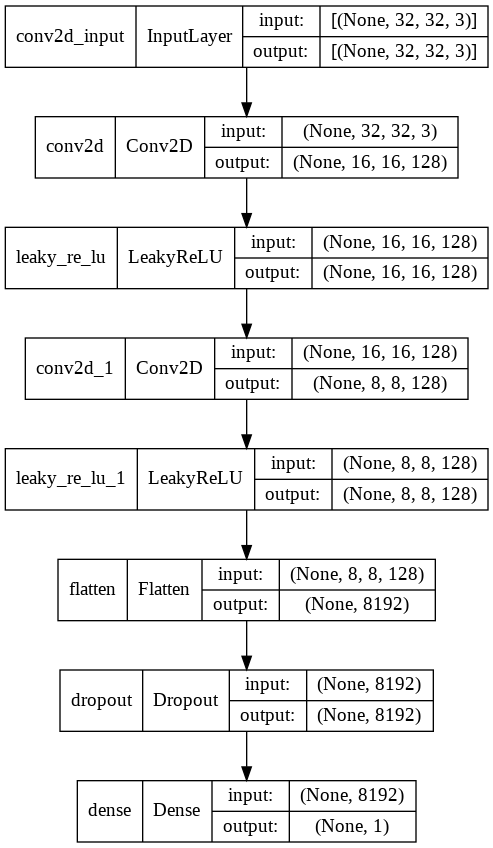

In [4]:
def define_discriminator(in_shape=INPUT_IMG_SZ):
	model = Sequential()
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape)) 
	model.add(LeakyReLU(alpha=0.2))
  # outputs become 16x16x128
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same')) # 8x8x128
	model.add(LeakyReLU(alpha=0.2))
  # output become 8x8x128
	
	model.add(Flatten()) #shape of 8192
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid')) #shape of 1

	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# summarize the model
	model.summary()
	
	# plot the model
	plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

	return model

test_discr = define_discriminator()
print(test_discr.summary())
plot_model(test_discr, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)


### print(test_discr.summary())
### define model
### model = define_discriminator()
### summarize the model
### model.summary()
### plot the model
### plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)
###

## **Images for Discriminator training** 
> **half real images and half fake images for each batch**

Pick a batch of random real samples to train the GAN

In fact, we will train the GAN on a half batch of real images (label 1) and another half batch of fake images (label 0) 

### ***real images*** samples from loaded cifar10 image database

We must scale the pixel values from the range of unsigned integers in [0,255] to the normalized range of [-1,1].

The generator model will generate images with pixel values in the range [-1,1] as it will use the  *$tanh()$*  activation function, a best practice.

*generate_real_samples():*
* The *generate_real_samples()* function will take the training dataset as an argument and will select a random subsample of images; 
* It will also return class labels for the sample, specifically a class label of 1, to indicate real images.

In [5]:
# load cifar training images
def load_real_samples():
	(trainX, _), (_, _) = load_data()
 
	# convert from unsigned ints to floats
	X = trainX.astype('float32')
 
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5  
  #Generator uses tanh activation so rescale original images to -1 to 1 to match the output of generator.
	return X

The model will be updated in batches, specifically with a collection of real samples and a collection of generated samples. 
> On training, an epoch is defined as one pass through the entire training dataset.

We could systematically enumerate all samples in the training dataset, and that is a good approach, but ,
> good training via **stochastic gradient descent** requires that the training dataset be shuffled prior to each epoch. 
> A simpler approach is to select random samples of images from the training dataset.

In [6]:
def generate_real_samples(dataset, n_samples):
	# choose random images
	ix = randint(0, dataset.shape[0], n_samples)
	# select the random images and assign it to X
	X = dataset[ix]
	# generate class labels and assign to y
	y = ones((n_samples, 1)) ##Label=1 indicating they are real
	return X, y

### ***fake image*** samples for Discriminator training

We can generate images comprised of random pixel values, specifically random pixel values in the range [0,1], then scaled to the range [-1, 1] like our scaled real images. The generator model will generate images with pixel values in the range [-1,1] as it will use the  **$tanh()$**  activation function, a best practice.

The ***generate_fake_samples()*** function below implements this behavior and generates images of random pixel values and their associated class label of 0, for fake.

In [7]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = np.random.rand(32 * 32 * 3 * n_samples)
 
	# update to have the range [-1, 1]
	X = -1 + X * 2

	# reshape into a batch of color images
	X = X.reshape((n_samples, 32, 32, 3))
 
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))

	return X, y

In [8]:
#### testing code for random numbers 
"""
x = random.uniform(0,1)
print(x)

T = np.random.rand(3 * 3 * 2)
print(f"T={T}")
"""

'\nx = random.uniform(0,1)\nprint(x)\n\nT = np.random.rand(3 * 3 * 2)\nprint(f"T={T}")\n'

## **Discriminator** model training

The model will learn to discriminate between real and fake (randomly generated) images rapidly.

The **train_discriminator()** function implements this, using a batch size of 128 images, where 64 are real and 64 are fake each iteration.

We update the discriminator separately for real and fake examples so that we can calculate the accuracy of the model on each sample prior to the update. This gives insight into how the discriminator model is performing over time.

In [9]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
	half_batch = int(n_batch / 2)
 
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples and update discriminator on real samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		_, real_acc = model.train_on_batch(X_real, y_real)
  
		# generate 'fake' examples and update discriminator on fake samples
		X_fake, y_fake = generate_fake_samples(half_batch)
		_, fake_acc = model.train_on_batch(X_fake, y_fake)

		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [10]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                

# **2. Generator** Model - How to Define and Use the Generator Model
Given input of **latent vector**, the Generator produces an image.(here: 32x32) ***latent_dim***, for example, can be 100, 1D array of size 100 

* Inputs: Point in latent space, e.g. a 100-element vector of Gaussian random numbers.
* Outputs: Two-dimensional square color image (3 channels) of 32 x 32 pixels with pixel values in [-1,1].

   

## **Generator** model definition

The generator model is responsible for creating new, fake, but plausible small photographs of objects.

It does this by taking a point from the latent space as input and outputting a square color image.

The **latent space** is an arbitrarily defined vector space of **Gaussian-distributed** values, e.g. 100 dimensions. 

It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training, the latent vector space represents a compressed representation of the output space, CIFAR-10 images, that only the generator knows how to turn into plausible CIFAR-10 images.


Here we are only using Dense and conv2d layers. But network can be complicated based on the application. For example, you can use VGG for super res. GAN.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

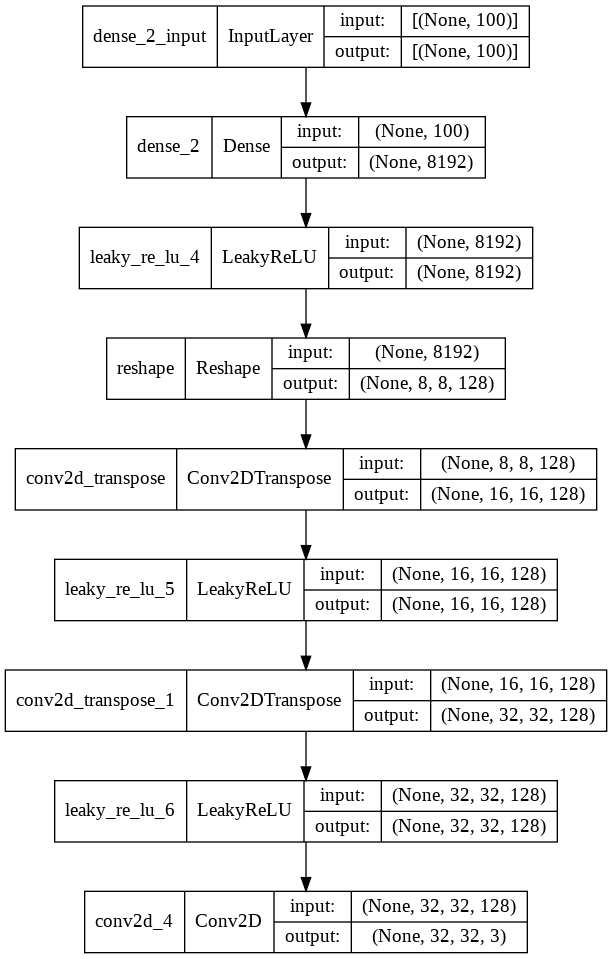

In [11]:
def define_generator(latent_dim):    
  #latent_dim is the dimension of the latent vector (e.g., 100)
	model = Sequential()
	# We will reshape input latent vector into 8x8 image as a starting point. 
  # So n_nodes for the Dense layer can be 128x8x8 so when we reshape the output 
  # it would be 8x8x128 and that can be slowly upscaled to 32x32 image for output.

	n_nodes = 128*8*8   #8192 nodes
	# Dense layer so we can work with 1D latent vector
	model.add(Dense(n_nodes, input_dim=latent_dim)) 
	model.add(LeakyReLU(alpha=0.2))
  # 8x8x128 dataset from the latent vector.
	model.add(Reshape((8, 8, 128)))   
	
  # upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) #16x16x128
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) #32x32x128
	model.add(LeakyReLU(alpha=0.2))
	# generate
	model.add(Conv2D(3, (8,8), activation='tanh', padding='same')) #32x32x3

	# summarize the model
	model.summary()
	# plot the model
	plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

	# Model not compiled as it is not directly trained like the discriminator.
	# Generator is trained via GAN combined model. 
	return model  

test_gen = define_generator(100)
plot_model(test_gen, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)
##print(test_gen.summary())

**Note**: the generator model is not compiled and does not specify a loss function or optimization algorithm. This is because the generator is not trained directly. 

## image generation for **Generator** model

### **latent vectors** generation as input to the generator
Generate n_samples number of latent vectors as input for the generator


The first step is to generate new points in the latent space. We can achieve this by calling the ***randn()*** NumPy function for generating arrays of random numbers drawn from a standard Gaussian.

The array of random numbers can then be reshaped into samples, that is n rows with 100 elements per row. 

In [12]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

### ***generate_fake_samples()*** updated to generate the required number of points in latent space

Next, we can use the generated points as input to the generator model to generate new samples, then plot the samples.

***generate_fake_samples()*** function is updated to take the generator model as an argument and use it to generate the desired number of samples by first calling the generate_latent_points() function to generate the required number of points in latent space as input to the model.


In [13]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                            

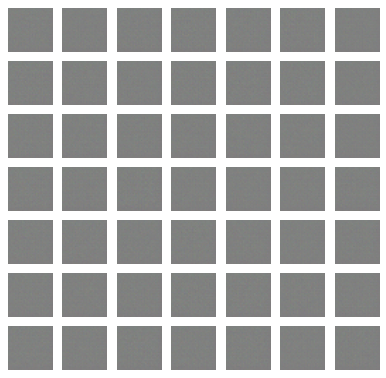

In [14]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the generated samples
figure(figsize=FIG_SIZE, dpi=80)
for i in range(n_samples):
	# define subplot
	pyplot.subplot(7, 7, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i])
# show the figure
pyplot.show()



As the model is not trained, the generated images are completely random pixel values in [-1, 1], rescaled to [0, 1]. As we might expect, the images look like a mess of gray.

# **3. GAN - Combined Generator and Discriminator** - Define and Train the Model
**zero-sum or adversarial relationship between these two models**


The weights in the Generator model are updated based on the performance of the Discriminator model.

> When the Discriminator is good at detecting fake samples, the Generator is updated more, and when the Discriminator model is relatively poor or confused when detecting fake samples, the Generator model is updated less.

This defines the **zero-sum or adversarial relationship between these two models**.

The simplest approach implement is to create a new model that combines the Generator and Discriminator models.

Specifically, a new GAN model can be defined that stacks the Generator and Discriminator such that the Generator receives as input random points in the latent space and generates samples that are fed into the Discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the Generator.

* **Discriminator**: Only the Discriminator is concerned with distinguishing between real and fake examples, therefore the Discriminator model can be trained in a standalone manner on examples of each, as we did in the section on the Discriminator model above.

* **Generator**: The Generator model is *only concerned with the Discriminator performance on fake examples. Therefore, we will mark all of the layers in the Discriminator as not trainable when it is part of the GAN model* so that they can not be updated and overtrained on fake examples.

When training the Generator via this logical GAN model, there is one more important change. We want the Discriminator to think that the samples output by the Generator are real, not fake. Therefore, when the Generator is trained as part of the GAN model, we will mark the generated samples as real (class 1).

## **GAN** - definition

We can imagine that the discriminator will then classify the generated samples as not real (class 0) or a low probability of being real (0.3 or 0.5). 

The backpropagation process used to update the model weights will see this as a large error and will update the model weights (i.e. only the weights in the Generator) to correct for this error, in turn making the Generator better at generating good fake samples.

* Inputs: Point in latent space, e.g. a 100-element vector of Gaussian random numbers.
* Outputs: Binary classification, likelihood the sample is real (or fake).

The GAN model uses the same binary cross entropy loss function as the Discriminator and the efficient [Adam version of stochastic gradient descent](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) with the *learning rate* of 0.0002 and *momentum* of 0.5, recommended when training deep convolutional GANs.

In [15]:
def define_gan(generator, discriminator):
	#Discriminator is trained separately. So set to not trainable.
	discriminator.trainable = False  

	# connect generator and discriminator
	model = Sequential()
	model.add(generator)
	model.add(discriminator)
	
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
 
	return model

The trainable property impacts the model after it is compiled. 
The **Discriminator** model was compiled with trainable layers, therefore the model weights in those layers will be updated when the standalone model is updated via calls to the ***train_on_batch()*** function.

This change in the trainable property does not impact the training of the standalone discriminator model.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_2 (Dropout)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                

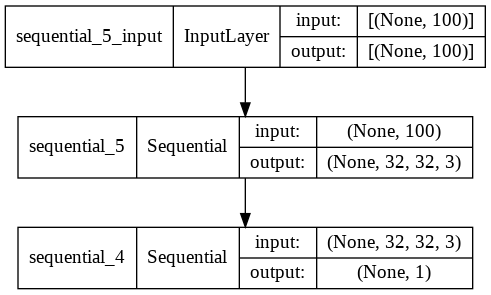

In [16]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

# **4. GAN model performance evaluation**

Generally, there are no objective ways to evaluate the performance of a GAN model.

Instead, images must be subjectively evaluated for quality by human. The adversarial nature of the training process means that the Generator is changing after every batch, meaning that once “good enough” images can be generated, the subjective quality of the images may then begin to vary, improve, or even degrade with subsequent updates.

There are three ways to handle this complex training situation.

1. Periodically evaluate the classification accuracy of the discriminator on real and fake images.
2. Periodically generate many images and save them to file for subjective review.
3. Periodically save the generator model.

All three of these actions can be performed at the same time for a given training epoch, such as every 10 training epochs. The result will be a saved generator model for which we have a way of subjectively assessing the quality of its output and objectively knowing how well the discriminator was fooled at the time the model was saved.

### plot of the generated samples

function to create a plot of the generated samples.

As we are evaluating the discriminator on 100 generated CIFAR-10 images, we can plot about half, or 49, as a 7 by 7 grid.

In [17]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  
  # plot the generated samples
  figure(figsize=FIG_SIZE, dpi=80)

  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i])
  # save plot to file
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

### performance summarization

Training the GAN over many epochs, such as hundreds or thousands of epochs, will result in many snapshots of the model that can be inspected, and from which specific outputs and models can be cherry-picked for later use.

First, we can define a function called ***summarize_performance()*** that will summarize the performance of the Discriminator model. It does this by retrieving a sample of real CIFAR-10 images, as well as generating the same number of fake CIFAR-10 images with the generator model, then evaluating the classification accuracy of the Discriminator model on each sample, and reporting these scores.

In [18]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.1f%%, fake: %.1f%%' % (acc_real*100, acc_fake*100))
 
 	# save plot
	save_plot(x_fake, epoch)
 
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch+1)
	g_model.save(filename)

# **5. GAN training - for Generator and Discriminator**



## Training the composite model

Training the composite model involves generating a batch worth of points in the latent space via the ***generate_latent_points()*** function, and class=1 labels and calling the ***train_on_batch()*** function.

The ***train_gan()*** function below demonstrates this, although it is pretty simple as only the generator will be updated each epoch, leaving the discriminator with default model weights.

In [19]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=200, n_batch=128):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
  
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
    
		gan_model.train_on_batch(x_gan, y_gan)

## complete ***train()*** function

Instead, what is required is that we 
1. first update the Discriminator model with real and fake samples, 
2. then update the Generator via the composite model.

This requires combining elements from the ***train_discriminator()*** function defined in the discriminator section, and the ***train_gan()*** function. It also requires that we enumerate over both epochs and batches within in an epoch.


1. the number of batches within an epoch is defined by how many times the batch size divides into the training dataset. 
> We have a dataset size of 50K samples, so with rounding down, there are 390 batches per epoch.

2. Discriminator model is updated twice per batch, once with real samples and once with fake samples
> best practice as opposed to combining the samples and performing a single update.

3. ***loss*** is reported at each batch. It is critical to keep an eye on the loss over batches. 
> A crash in the Discriminator loss indicates that the Generator model has started generating rubbish examples that the discriminator can easily discriminate.

4. Monitor the **Discriminator loss** and expect it to hover around **0.5 to 0.8** per batch. The **Generator loss** is less critical and may hover between 0.5 and 2 or higher. 
> A clever programmer might even attempt to detect the crashing loss of the discriminator, halt, and then restart the training process.

The complete train function for updating the discriminator model and the generator (via the composite model) is listed below.

* looping through a number of epochs to train our Discriminator by 

> 1.   Selecting a random batch of images from our true/real dataset
> 2.   Generating a set of images using the generator
> 3.   Feed both set of images into the Discriminator
> 4.   Set the loss parameters for both the real and fake images, as well as the combined loss.

In [20]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128, f_model="gan_model"):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)   
	
  # manually enumerate epochs and bacthes. 
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
    
      # ================== Discriminator ==================
      # Discriminator model is updated with a batch = half real samples + half fake samples
      # Train the discriminator on real and fake images, separately (half batch each)
      # Research showed that separate training is more effective. 
			
      # randomly selected 'real' samples, train_on_batch to update weights based on real samples
			# update discriminator model weights, just capture loss and ignore accuracy value      
			X_real, y_real = generate_real_samples(dataset, half_batch)
			d_loss_real, _ = d_model.train_on_batch(X_real, y_real) 
			
      # generate 'fake' examples and update discriminator model weights
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)

      # Average loss if you want to report single..            
      #d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) 

      # ================== Generator ==================
			# X_gan: prepare points in latent space as input for the generator
      # y_gan: create inverted labels for the fake samples
      #   The Generator wants the Discriminator to label the generated samples as valid (ones)
      #   The Generator is trying to trick Discriminator in believing the generated image is true 
      #                 (hence value of 1 for y)			    
      # update the generator via the discriminator's error        
			X_gan = generate_latent_points(latent_dim, n_batch)		
			y_gan = ones((n_batch, 1))
			g_loss = gan_model.train_on_batch(X_gan, y_gan)   
            
      # Generator is part of combined model where it got directly linked with the discriminator
      # Train the generator with latent_dim as x and 1 as y. 
			
      # Print losses on this batch
			if ((j+1) % (int(bat_per_epo/10)) == 0):
			  print('Epoch>%d, Batch %3d%%, d1=%.3f, d2=%.3f g=%.3f' \
          %(i+1, int((j+1)*100/bat_per_epo), d_loss_real, d_loss_fake, g_loss))

		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)
   
    # save the model after each epoch
    # g_model.save('cifar_generator_2epochs.h5')
		g_model.save(f"{f_model}.{i+1}_{n_epochs}.h5")

	# save the generator model
	g_model.save(f"{f_model}_final.h5")
	#g_model.save('cifar_generator_2epochs.h5')

### Note

# **6. GAN for CIFAR-10** Complete Example of 

The chosen configuration results in the stable training of both the generative and discriminative model.

The model performance is reported every batch, including the loss of both the Discriminative (d_model) and Generative (g_model) models.

### Example

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=500, f_model="cifar_gan")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                

### Note

* results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. 
* In this case, the loss remains stable over the course of training. 
* The discriminator loss on the real and generated examples sits around 0.5, whereas the loss for the generator trained via the discriminator sits around 1.5 for much of the training process.

# **7. Image generation** with final generator model 

In [ ]:
import numpy as np
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
from matplotlib.pyplot import figure

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# Plot generated images 
def show_plot(examples, n):
  figure(figsize=FIG_SIZE, dpi=80)
  for i in range(n * n):
    plt.subplot(n, n, 1 + i)
    plt.axis('off')
    plt.imshow(examples[i, :, :, :])
  plt.show()

# plot the generated images
def create_plot(examples, n):
  figure(figsize=FIG_SIZE, dpi=80)
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :])
  pyplot.show()
 
# load model
model = load_model('/content/cifar_gan_final.h5') 
# Model trained for 100 epochs

# generate images
#latent_points = generate_latent_points(100, 25)  
latent_points = generate_latent_points(100, 100)  
#Latent dim and n_samples

# generate images
X = model.predict(latent_points)

# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
create_plot(X, 10)

X = (X*255).astype(np.uint8)

# plot the result
show_plot(X, 5)

#Note: CIFAR10 classes are: airplane, automobile, bird, cat, deer, dog, frog, horse,
# ship, truck

In [ ]:
import os

os.getcwd()